# COMANDOS AUXILIARES

## Funções auxiliares

In [279]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    

In [280]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Inserção de imagens

In [281]:
from IPython.display import Image

## Imports

In [282]:
from IPython.core.display import HTML
import seaborn as sns
import pandas  as pd
import numpy   as np
import math

# KICK OFF DO PROJETO!

## Contexto do Problema de Negócio

A Xtreme Groovy Bikes Sales é uma empresa de revenda de motocicletas. Seu modelo de nogócio é revender motocicletas usadas. Com a crescente do valor dos veículos usados, a XGB Sales, como é conhecida, deseja expandir os seus negócios. Você foi contratado como cientista de dados pela empresa XGB Sales para ajudá-los a encotrar as melhores motocicletas para revenda. 

Para isso, o CEO da empresa fez um estudo de mercado lhe entregou uma base de dados, obtida através desse estudo, para que você consiga auxiliá-lo a encontrar as melhores motocicletas para revenda, aumentando assim o lucro da empresa.

Além disso, o CEO lhe fez algumas perguntas a cerca da base de dados que a empresa possui.
Lembrando que o contexto, pessoas e perguntas são completamente fictícios e existem somente na minha imaginação.

## O Desafio

A empresa XGB Sales lhe contratou como cientista de dados pois ela deseja aumentar o seu lucro comprando e revendendo as melhores motos disponíveis dentro da base de dados que a empresa adquiriu através de um estudo de mercado. 

Dessa forma, o CEO da XGB Sales lhe fez as seguintes perguntas:

1. Quantas motos temos dentro do Dataset?
2. Qual é o ano da moto mais antiga da base de dados?
3. Qual é o ano da moto mais nova da base de dados?
4. Qual é o valor da moto mais cara da base de dados?
5. Qual é o valor do hodômotro da moto com a maior quilometragem?
6. Qual é o valor do hodômotro da moto com a menor quiilometragem?
7. Das motocicletas que estão sendo expostas dentro de um Show Room, qual é o maior valor registrado na base de dados?
8. Das motocicletas que estão sendo expostas dentro de um Show Room, qual é o menor valor registrado na base de dados?
9. Quantas motocicletas estão sendo vendidades pelos seus donos e quantas estão sendo vendidas por outros revendedores?
10. Qual é a média de valores das motos na base de dados?
11. Qual é a média de ano das motos cadastradas dentro da base de dados?
12. Qual é a média de quilometragem das motos cadastradas dentro da base de dados?
13. Existem quantas motos dentro da base de dados que são motos de um único dono?
14. As motos com menor quilometragem são as motos mais baratas do Dataset?

## A Base de Dados

O conjunto de dados que representam o contexto está disponível na plataforma do Kaggle. O link para acesso aos dados:

[Motorcycle Dataset](https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset)

## Como Solucionar Esse Desafio

Aqui vão algumas dicas para você começar a resolver esse problema:

* **Tenha calma e não tenha medo:** Crie suposições e faça testes, dando um passo de cada vez para, a cada novo passo, estar mais próximo da resposta.

* **Responda as perguntas antes de Codificar:** Como você faria, se não tivesse que programar, para responder as perguntas feitas? Pensando antes em como responder, facilitará no momento de codificar o algoritmo para achar a resposta, porque isso faz parte do planejamento da solução!

* **Tenha Paciência e Resiliência:** Criar soluções e, principalmente, pensar e planejá-las leva tempo. Assuma uma postura resiliente e não desista! Afinal, você quer se tornar um Cientista de Dados, ganhar ótimos salários e trabalhar em ótimas empresas, certo?

* **A Comunidade:** Caso você tenha tentado várias estratégias e não tenha chegado a uma solução ou não tenha avançado, peça ajuda dentro da Comunidade de DS! Estamos todos para nos ajudar nessa jornada que é a Ciência de Dados.

* **Crie Visualizações:** Caso a tabela gerada com as informações não seja de fácil entendimento, gere um gráfico/visualização para facilitar a compreensão do CEO.

* **Estudem os dados antes de Qualquer coisa:** Façam a leitura do arquivo e estudem o que cada coluna representa. Criem a dicionário explicado cada uma das colunas.

## Solucionando o Desafio

In [283]:
data= pd.read_csv('../fund_prog_project/data/bike.csv',low_memory=False)

# 1.0 Descrição das colunas

**name**: Modelo/marca da motocicleta

**selling_price**: Preço de venda da motocicleta

**year**: Ano de compra da motocicleta

**seller_type**: refere-se ao tipo de vendedor, individual ou dealer(revendedor)

**owner**: Indica se o atual proprietário da nmotocicleta é o primeiro dono ou não.
         ('1st owner', '2nd owner', '3rd owner', '4th owner')

**km_driven**: Km rodados pelo veículo atéo momento.

**ex_showroom_price**: Valor de venda do veículo em showroom (motocicletas com NaN nessa coluna não estão em showroom)





## 1.1 Data Dimensions

In [284]:
print(f'Number of Rows:{data.shape[0]}')
print(f'Number of columns:{data.shape[1]}')

Number of Rows:1061
Number of columns:7


In [285]:
data.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [286]:
#convert selling price - int to float
data['selling_price'] = data['selling_price'].astype(float)
data['ex_showroom_price'] = data['ex_showroom_price'].astype(float)

## 1.2 Check NA

In [287]:
data.isna().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

## 1.2 Fillup NA

In [288]:
data['ex_showroom_price'] = data['ex_showroom_price'].apply( lambda x: 0 if math.isnan(x) else x)

In [289]:
data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,0.0
1,Honda Dio,45000.0,2017,Individual,1st owner,5650,0.0
2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,0.0


# 2.0 Feature Engineering

In [332]:
df2= data.copy()

In [333]:
# applying strip in the name
df2['name'] = df2['name'].str.strip()

# Creating new columns for bikes in show room 
df2['in_showroom'] = df2['ex_showroom_price'].apply(lambda x:'0' if x == 0.0 else '1')

In [336]:
#list of available bikes
model_list = ['Royal Enfield ', 'Honda','Hero Honda','Bajaj','Jawa','Suzuki','TVS','KTM','Mahindra','Aprilia','Vespa','UM','Harley-Davidson','Kawasaki','BMW','Benelli','Yo','Hyosung','Hero','Yamaha','Activa']

# Getting brand
# df2['bike_model'] = df2['name'].apply(lambda x: i if x.contains(i) in model_list else x)
# 

df2['bike_brand']  = ''
for i in model_list: df2['bike_brand'] = np.where(df2['name'].str.contains(i),i, df2['bike_brand'] )
    
    
# Converting Activa to Honda
df2['bike_brand'] = np.where(df2['bike_brand'].str.startswith('Activa'),'Honda', df2['bike_brand'] )

#remove word owner
df2['owner'] = df2['owner'].str.replace('owner','')

# seller_type
df2['seller_type'] = df2['seller_type'].str.lower()

#name
# df2['name'] = df2['name'].str.replace(' ','_')
# df2['name'] = df2['name'].str.lower()

#Na coluna name ainda da para separar o modelo da bike em uma nova coluna
# df2['bike_model'] = df2['name'].str.replace(str(df2['bike_brand']),'')


In [337]:
df2.sample(15)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,in_showroom,bike_brand
232,Honda Shine,30000.0,2010,individual,1st,46782,0.0,0,Honda
722,Hero Glamour 125,15000.0,2011,individual,1st,75000,61600.0,1,Hero
254,TVS Scooty Pep Plus,30000.0,2011,individual,1st,20000,0.0,0,TVS
756,Bajaj Platina 100,40000.0,2018,individual,1st,17500,0.0,0,Bajaj
299,Bajaj Avenger Street 150 [2018],40000.0,2016,individual,1st,29689,80435.0,1,Bajaj
537,Bajaj Pulsar 150,25000.0,2015,individual,2nd,50000,0.0,0,Bajaj
662,Suzuki Access 125,40000.0,2017,individual,1st,15000,0.0,0,Suzuki
47,Yamaha FZ16,30000.0,2009,individual,2nd,26000,78712.0,1,Yamaha
164,Honda CB Hornet 160R,48000.0,2016,individual,2nd,25000,88161.0,1,Honda
16,Hero Honda Glamour,25000.0,2006,individual,1st,27000,0.0,0,Hero


# 3 Respondendo as perguntas do CEO

In [294]:
df3 = df2.copy()

**1. Quantas motos temos dentro do Dataset?**

In [295]:
total_motos = df3['name'].count()
print(f'Atualmente existem {total_motos} disponíveis para venda.')

Atualmente existem 1061 disponíveis para venda.


**2. Qual é o ano da moto mais antiga da base de dados?**

In [296]:
menor_ano = df3['year'].min()
print(f'A moto mais antiga disponível é de {menor_ano} .')

A moto mais antiga disponível é de 1988 .


**3. Qual é o ano da moto mais nova da base de dados?**


In [297]:
maior_ano = df3['year'].max()
print(f'A moto mais nova disponível é de {maior_ano} .')

A moto mais nova disponível é de 2020 .


**4. Qual é o valor da moto mais cara da base de dados?**

In [298]:
maior_valor = df3['selling_price'].max()
print('A moto mais cara disponível está a venda por R${:0,.2f}'.format(maior_valor))

A moto mais cara disponível está a venda por R$760,000.00


**5. Qual é o valor do hodômotro da moto com a maior quilometragem?**

In [299]:
maior_km = df3['km_driven'].max()
print(' A moto com maior km tem {:,.1f}'.format(maior_km) +' quilômetros.')

 A moto com maior km tem 880,000.0 quilômetros.


**6. Qual é o valor do hodômotro da moto com a menor quiilometragem?**

In [300]:
menor_km = df3['km_driven'].min()
print(' A moto com menor km tem {:,.1f}'.format(menor_km) +' quilômetros.')

 A moto com menor km tem 350.0 quilômetros.


**7. Das motocicletas que estão sendo expostas dentro de um Show Room, qual é o maior valor registrado na base de dados?**

In [301]:
aux = df3[df3['in_showroom']=='1']
maior_valor_sr = df3['selling_price'].max()
maior_valor_sr
print(' A moto mais cara exposta em um showroom custa R${:,.2f}'.format(maior_valor_sr) )

 A moto mais cara exposta em um showroom custa R$760,000.00


**8. Das motocicletas que estão sendo expostas dentro de um Show Room, qual é o menor valor registrado na base de dados?**

In [302]:
aux = df3[df3['in_showroom']=='1']
menor_valor_sr = df3['selling_price'].min()
menor_valor_sr
print(' A moto mais barata exposta em um showroom custa R${:,.2f}'.format(menor_valor_sr) )

 A moto mais barata exposta em um showroom custa R$5,000.00


**9. Quantas motocicletas estão sendo vendidades pelos seus donos e quantas estão sendo vendidas por outros revendedores?**

In [303]:
aux = df3.loc[:,['seller_type','name']].groupby('seller_type').count()
aux

,name
seller_type,
dealer,6
individual,1055


**10. Qual é a média de valores das motos na base de dados?**

In [304]:
media = df3['selling_price'].mean()
print('A média de preço das motos disponíveis na base de dados é de R${:,.2f}'.format(media))

A média de preço das motos disponíveis na base de dados é de R$59,638.15


**11. Qual é a média de ano das motos cadastradas dentro da base de dados?**

In [305]:
media_ano = np.round(df3['year'].mean())
print('A média de ano das motos da base de dados é de {:.0f}'.format(media_ano))

A média de ano das motos da base de dados é de 2014


**12. Qual é a média de quilometragem das motos cadastradas dentro da base de dados?**

In [306]:
media_km = df3['km_driven'].mean()
print('A média de quilometragem das motos da base de dados é de {:,.2f}'.format(media_km))

A média de quilometragem das motos da base de dados é de 34,359.83


**13. Existem quantas motos dentro da base de dados que são motos de um único dono?**

In [307]:
aux = df3.loc[:,['owner','name']].groupby('owner').count().reset_index()
aux

,owner,name
0,1st,924
1,2nd,123
2,3rd,11
3,4th,3


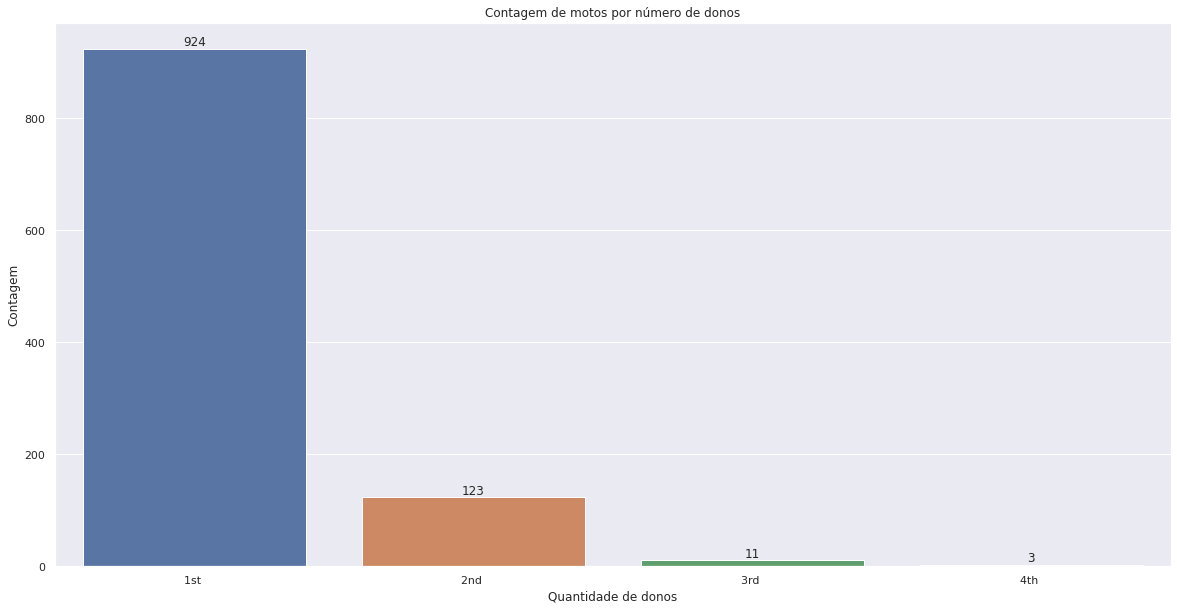

In [308]:
ax=sns.barplot(x='owner',y='name',data=aux)

ax.bar_label(ax.containers[0])

ax.set(
    title = 'Contagem de motos por número de donos',
    xlabel = 'Quantidade de donos',
    ylabel = 'Contagem');


**14. As motos com menor quilometragem são as motos mais baratas do Dataset?**

In [309]:
aux1 = df3.loc[:,['km_driven','selling_price']].groupby('km_driven').mean().reset_index()

# bins= list( np.arange(0,300000,5000))
# aux1['km_driven_binned'] = pd.cut(data['km_driven'],bins=bins)

# aux2 = aux1[['km_driven_binned','selling_price']].groupby('km_driven_binned').mean().reset_index()

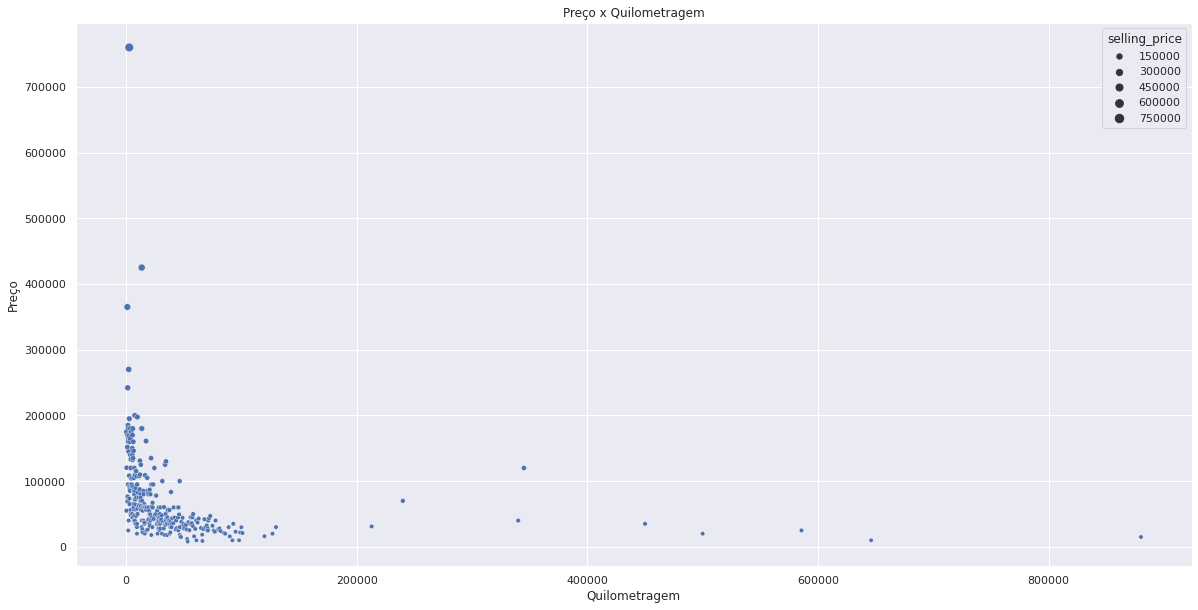

In [310]:
# ax=sns.barplot(x='km_driven_binned',y='selling_price',data=aux2)
# plt.xticks(rotation=90);

ax = sns.scatterplot(data = aux1, x = 'km_driven',  y = 'selling_price',  size = 'selling_price')#     hue = 'GoalsScored' )

ax.set(
    title = 'Preço x Quilometragem',
    xlabel = 'Quilometragem',
    ylabel = 'Preço');

In [311]:
df3.head()



,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,in_showroom,bike_brand
0,Royal Enfield Classic 350,175000.0,2019,individual,1st,350,0.0,0,Royal Enfield
1,Honda Dio,45000.0,2017,individual,1st,5650,0.0,0,Honda
2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,individual,1st,12000,148114.0,1,Royal Enfield
3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,individual,1st,23000,89643.0,1,Yamaha
4,Yamaha SZ [2013-2014],20000.0,2011,individual,2nd,21000,0.0,0,Yamaha


In [312]:
aux= df3.loc[:,['bike_brand','selling_price']].groupby('bike_brand').mean().sort_values('selling_price', ascending=False).reset_index()
aux

,bike_brand,selling_price
0,Harley-Davidson,540000.000000
1,BMW,300000.000000
2,Kawasaki,287500.000000
3,Jawa,175000.000000
4,Benelli,160000.000000
5,UM,156666.666667
6,KTM,155708.333333
7,Hyosung,135000.000000
8,Royal Enfield,128549.541284
9,Suzuki,73800.000000


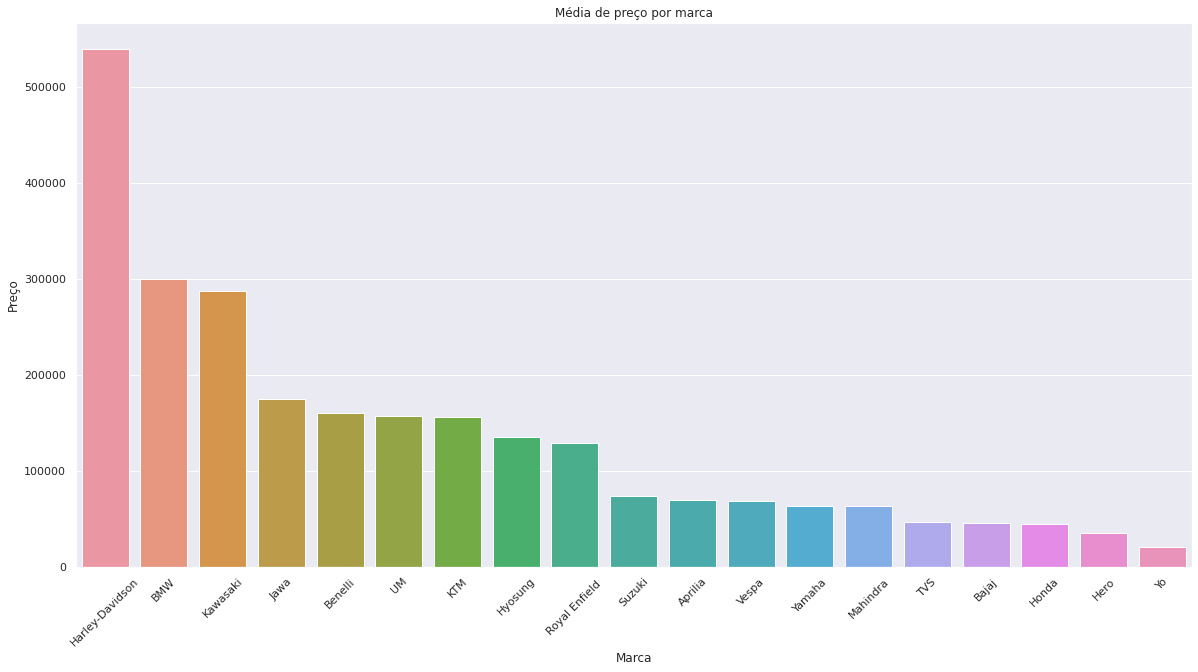

In [344]:
ax=sns.barplot(x='bike_brand',y='selling_price', data=aux)
plt.xticks(rotation=45)
ax.set(
    title= 'Média de preço por marca',
    xlabel= 'Marca',
    ylabel= 'Preço');